## Examen 3

1) Determine el espacio de configuraciones, en los ejes $(x,\omega)$, del movimiento horizontal sin fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$.


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy.random as rd
import pandas as pd
import scipy.optimize as optimize

In [4]:
m = 0.2 #kg
k = 1 #N/m
ω2 = k/m

def dU_dt(U,t):
    return np.array([U[1],
                     -ω2*U[0]])

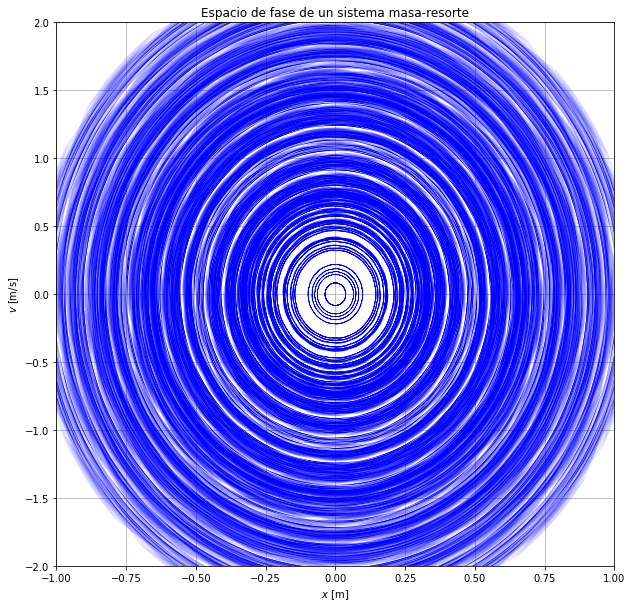

In [34]:
n = 200
x0s = rd.uniform(-1,1,n)
v0s = rd.uniform(-1,1,n)

i=0
plt.figure(figsize=(10,10))  
for x0,v0 in zip(x0s,v0s):
    t=np.linspace(0,100,500)
    U0=np.array([x0,v0])
    Y=odeint(dU_dt,U0,t,atol=1e-12,rtol=1e-12)
    plt.plot(Y[:,0],Y[:,1],linewidth=0.05,color='b')
    if i==n:
        break
    i+=1
    
plt.xlabel( "$x$ [m]", fontsize = 10)
plt.ylabel( "$v$ [m/s]", fontsize = 10 )
plt.xlim( (-1, 1) )
plt.ylim( (-2, 2) )
plt.title( "Espacio de fase de un sistema masa-resorte" )
plt.grid()    
plt.show()

2) Considere una muestra de Strontium-90, ${}^{90}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos: 

[https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json) 

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente. 

El decaimiento radiativo está determinado por la formula
$$
N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}
$$
* $N(t)$ es el número de núcleos radioactivos que qedan despues de un tiempo $t$
* $N_0$ es el número inicial de las partículas presentes (es decir, $t=0$)
* $\lambda$ es la constante de decaimiento
* $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

# a.

In [29]:
df=pd.read_json('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json')

In [36]:
df

,t,N(t)
0,0,1000
1,10,809
2,22,564
3,33,480
4,40,370
5,50,285
6,60,199
7,70,169
8,80,131
9,99,101


Nótese que si $\lambda=\dfrac{\ln (2)}{\tau}$, entonces:

\begin{equation}
N(t)=N_0e^{-\frac{\ln (2)}{\tau}t}=N_0\cdot 2^{-\frac{t}{\tau}}
\end{equation}

In [72]:
def f(t,N0,τ,d):
    return N0*2**(-t/τ)+d

In [73]:
N,ΔN=optimize.curve_fit(f,df['t'].values,df['N(t)'].values)

In [74]:
N

array([1.01294893e+03, 2.76435922e+01, 1.74116624e-03])

In [75]:
ΔN

array([[151.47054242,  -2.12421939, -18.65706884],
       [ -2.12421939,   0.57397485,  -3.3824475 ],
       [-18.65706884,  -3.3824475 ,  37.59223023]])

In [81]:
σ=np.sqrt(np.diag(ΔN))
print('τ={:.2f}±{:.2f} años'.format(N[1],σ[1])) 

τ=27.64±0.76 años


# b.

In [76]:
t=np.linspace(0,200,400)

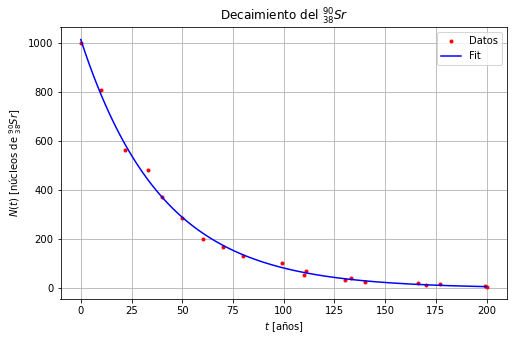

In [83]:
plt.figure(figsize=(8,5))
plt.plot(df['t'].values,df['N(t)'].values,'r.', label='Datos')
plt.plot(t,N[0]*2**(-t/N[1])+N[2],'b', label='Fit')
plt.title('Decaimiento del $^{90}_{38}Sr$')
plt.grid()
plt.xlabel('$t$ [años]')
plt.ylabel('$N(t)$ [núcleos de $^{90}_{38}Sr$]')
plt.legend()
plt.show()